In [3]:
!pip install pandas scikit-learn nltk
!pip install scikit-learn sentence_transformers pandas numpy
!pip install -U sentence-transformers
!pip install -U scikit-learn


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [5]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


verified_review = pd.read_csv('pre_progress_data.csv')
verified_review['text']=verified_review['text'].astype(str)
review_data = verified_review['text']
print(review_data)



/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


0           Part came quickly and fit my LG dryer.  Thanks!
1         My old door hinge broke.  This worked perfectl...
2         Wish it was a little less expensive and made o...
3                        Quick ship and this did the trick!
4         Eeceive timely and was the correct part for th...
                                ...                        
342696                            Perfect fit!  Great price
342697    my model is listed but this wheel is smaller t...
342698    Received this circuit board in. Put it in my d...
342699                            Fits properly, thank you!
342700                                Working good thankyou
Name: text, Length: 342701, dtype: object


In [6]:
verified_review[verified_review['text'].isnull()]

,Unnamed: 0,rating,title_x,text,parent_asin,timestamp,verified_purchase,main_category,title_y,average_rating,rating_number,store,processed_text


In [7]:
model = SentenceTransformer('all-MiniLM-L6-v2')  # load SBERT
embeddings = model.encode(review_data.tolist(), show_progress_bar=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Batches:   0%|          | 0/10710 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/10710 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self._algorithm = self.algorithm
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c1e7c4f8b80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlo

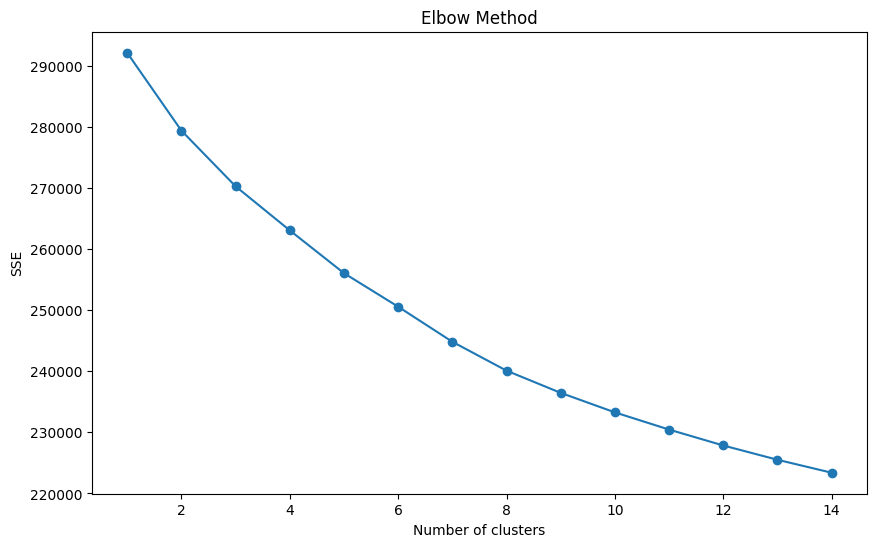

In [8]:


# SSE
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(embeddings)
    sse.append(kmeans.inertia_)

# Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [8]:

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
k = 7
kmeans = KMeans(n_clusters=k, random_state=0).fit(embeddings)
# Result
labels = kmeans.labels_
print("Cluster assignments:", labels)

cluster_data = []

for i in range(k):
    cluster_documents = review_data[labels == i]
    for doc in cluster_documents:
        cluster_data.append({'Category': f"Cluster {i+1}", 'text': doc})

# DataFrame
cluster_df = pd.DataFrame(cluster_data)

print(cluster_df.head())



Cluster assignments: [0 5 1 ... 5 0 4]
    Category                                               text
0  Cluster 1    Part came quickly and fit my LG dryer.  Thanks!
1  Cluster 1  Easy to install and fit exactly as the part it...
2  Cluster 1                  So far so good. Fit like a glove.
3  Cluster 1                Did the job. Same as original part.
4  Cluster 1                 Look and install like the original


In [9]:
# Save
cluster_df.to_csv('cluster_df.csv', index=False)

In [6]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
import pandas as pd
# Initialize the model
model = SentenceTransformer("all-MiniLM-L6-v2")
verified_review = pd.read_csv('pre_progress_data.csv')
verified_review = verified_review.astype(str)
characteristics = {
    "Price": ["price", "buy", "cheaper", "value", "money", "bought", "worth", "ordered", "saved"],
    "Install & Replace": ["replace", "replacement", "install", "installation", "fixed"],
    "Delivery": ["fast"],
    "Design": ["look"],
    "Size": ["original", "fit", "small", "little", "space", "size"],
    "Performance": ["work", "worked", "use", "clean", "noise", "working"],
    "Service": ["problem", "solved"],
    "Quality": ["broken"],
    "Emotion": ["great", "perfectly", "good", "love", "nice", "happy", "best", "excellent", "like"]
}

# Create a list of all characteristic phrases
all_phrases = [phrase for phrases in characteristics.values() for phrase in phrases]


# Compute embeddings for document sentences and characteristic phrases
document_sentences = verified_review['text'].tolist()
document_embeddings = model.encode(document_sentences)
phrase_embeddings = model.encode(all_phrases)

# Compute cosine similarities
similarities = util.pytorch_cos_sim(document_embeddings, phrase_embeddings).numpy()

# Output the pairs with their score
for idx_i, sentence in enumerate(document_sentences):
    print(f"Document Sentence: '{sentence}'")
    for characteristic, phrases in characteristics.items():
        # Get the indices of the phrases corresponding to the current characteristic
        phrase_indices = [all_phrases.index(phrase) for phrase in phrases]
        # Get the maximum similarity score for the current characteristic
        max_similarity = max(similarities[idx_i][phrase_indices])
        print(f" - Characteristic '{characteristic}': {max_similarity:.4f}")
    print()


流式输出内容被截断，只能显示最后 5000 行内容。
 - Characteristic 'Size': 0.1707
 - Characteristic 'Performance': 0.5276
 - Characteristic 'Service': 0.5582
 - Characteristic 'Quality': 0.4729
 - Characteristic 'Emotion': 0.2787

Document Sentence: 'Que me duro mas que otras marcas excelente calidad excelente en todas las opiniones'
 - Characteristic 'Price': 0.2490
 - Characteristic 'Install & Replace': 0.1372
 - Characteristic 'Delivery': 0.0691
 - Characteristic 'Design': 0.1053
 - Characteristic 'Size': 0.1962
 - Characteristic 'Performance': 0.1767
 - Characteristic 'Service': 0.1546
 - Characteristic 'Quality': 0.1013
 - Characteristic 'Emotion': 0.1774

Document Sentence: 'I like this dryer because it does what its supposed to do but its very cheaply made. It broke when i was putting it together. Dries the clothes pretty good though. Just keep it in one place.'
 - Characteristic 'Price': 0.0754
 - Characteristic 'Install & Replace': 0.1079
 - Characteristic 'Delivery': 0.0247
 - Characteristic 'Desi

In [7]:
from transformers import pipeline
import torch
from transformers import pipeline, BertTokenizer

# Ensure you are running on GPU if available
device = 0 if torch.cuda.is_available() else -1

# Initialize sentiment analysis pipeline with a specific model
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)
tokenizer = BertTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [8]:

# Define similarity threshold
similarity_threshold = 0.2

# Collect results in a list
results = []

# Output the pairs with their score and sentiment
for idx, sentence in enumerate(document_sentences):
    print(f"Document Sentence: {sentence}")
    max_similarity = 0
    best_characteristic = None

    for characteristic, phrases in characteristics.items():
        phrase_indices = [all_phrases.index(phrase) for phrase in phrases]
        current_max_similarity = max(similarities[idx, phrase_indices])

        if current_max_similarity > max_similarity:
            max_similarity = current_max_similarity
            best_characteristic = characteristic

    if max_similarity > similarity_threshold:
        # Tokenize the sentence to check its length
        tokens = tokenizer.encode(sentence, truncation=True,max_length=500)
        truncated_sentence = tokenizer.decode(tokens)
        # Get the sentiment
        sentiment = sentiment_pipeline(truncated_sentence)
        sentiment_label = sentiment[0]['label']
        sentiment_score = sentiment[0]['score']

        # Determine the polarity of the sentiment
        if sentiment_label in ['1 star', '2 stars']:
            sentiment_polarity = 'negative'
        elif sentiment_label in ['4 stars', '5 stars']:
            sentiment_polarity = 'positive'
        else:
            sentiment_polarity = 'neutral'

    # Append the results to the list
    results.append({
        'Sentence': sentence,
        'Characteristic': best_characteristic,
        'Characteristic Score': max_similarity,
        'Sentiment Polarity': sentiment_polarity,
        'Stars': sentiment_label,
        'Sentiment Score': sentiment_score
    })

# Convert the results list to a DataFrame
final_data = pd.DataFrame(results)

#print(f" - Characteristic '{best_characteristic}': {max_similarity:.4f}, sentiment polarity: {sentiment_polarity} ({sentiment_label} {sentiment_score:.4f})")


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


流式输出内容被截断，只能显示最后 5000 行内容。
Document Sentence: This product melted the first time that the oven was used.
Document Sentence: It fit! I was very pleased that not only did the product fit but it was sturdy, made of good quality.
Document Sentence: Exact replacement.  Works perfectly.
Document Sentence: Works great!
Document Sentence: Install into a custom hood range was pretty easy. I had to make some adjustments to the ductwork due to some attic clearance issues, but it mated up tightly.  I don't think we've ever used the highest setting on this since low and medium seem to do what we need.
Document Sentence: Replacement bin is exactly what we wanted.
Document Sentence: Works just too expensive
Document Sentence: It was an exact replacement
Document Sentence: Large burner barely would light and stay lit. Vendor gave full refund though. Thank you.
Document Sentence: Don't buy unless you like regrets
Document Sentence: Delivered as expected, worked just fine.
Document Sentence: Product and

In [9]:
verified_review = verified_review.reset_index(drop=True)
final_data = final_data.reset_index(drop=True)
df_all = pd.concat([verified_review, final_data], axis=1)

In [5]:
df_all.to_csv('df_all_M2.csv', index=False)

NameError: name 'df_all' is not defined

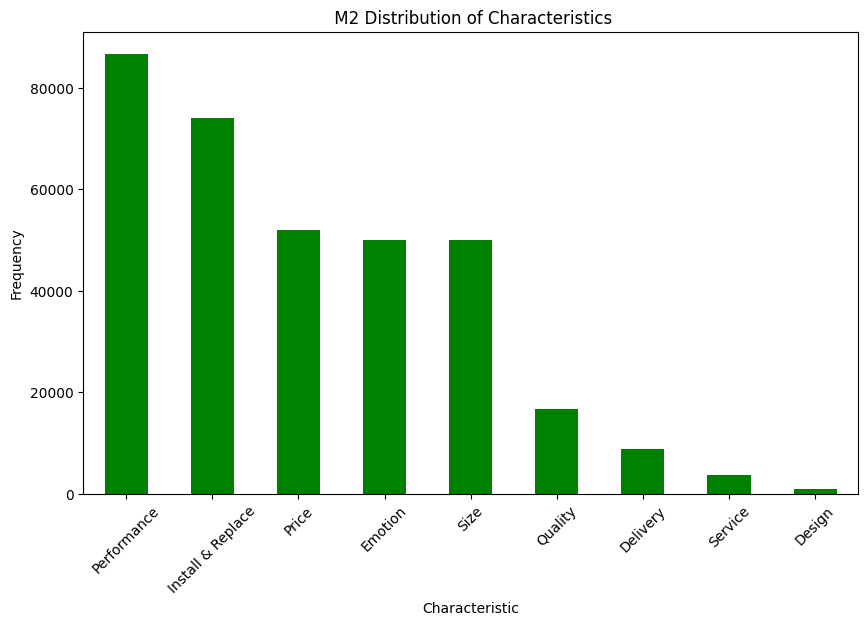

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
df_all =pd.read_csv('df_all_M2.csv')
# Plot 1: Distribution of Characteristics
plt.figure(figsize=(10, 6))
df_all['Characteristic'].value_counts().plot(kind='bar',color='green')
plt.title(' M2 Distribution of Characteristics')
plt.xlabel('Characteristic')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

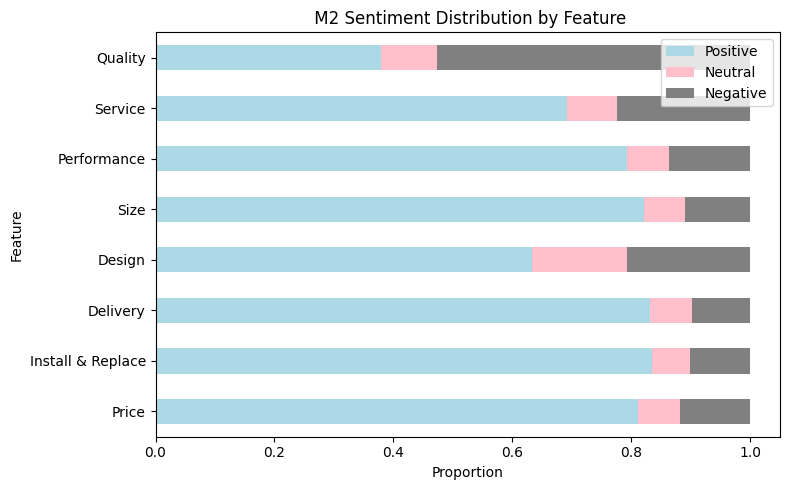

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data


# Clean data
df_all['Sentiment Polarity'] = df_all['Sentiment Polarity'].str.strip()
df_all['Stars'] = df_all['Stars'].str.strip()
df_all['Sentiment Score'] = df_all['Sentiment Score'].astype(float)
df_all['Characteristic Score'] = df_all['Characteristic Score'].astype(float)
df_all['Characteristic'] = df_all['Characteristic'].str.strip()

# Map sentiment to labels for visualization
df_all['label'] = df_all['Sentiment Polarity'].map({'positive': 0, 'neutral': 1, 'negative': 2})

# Feature list
features = [
    'Price',
    'Install & Replace',
    'Delivery',
    'Design',
    'Size',
    'Performance',
    'Service',
    'Quality'
]

# Prepare figure layout
fig, ax = plt.subplots(figsize=(8, 5))

# Initialize an empty DataFrame to store sentiment data for each feature
sentiment_data = pd.DataFrame()

for feature in features:
    subset = df_all[df_all['Characteristic'] == feature]
    sentiment_distribution = subset['Sentiment Polarity'].value_counts(normalize=True)
    sentiment_distribution = sentiment_distribution.reindex(['positive', 'neutral', 'negative'], fill_value=0)
    sentiment_data = pd.concat([sentiment_data, sentiment_distribution.to_frame().T])

# Set the feature names as the index
sentiment_data.index = features

# Plotting
sentiment_data.plot(kind='barh', stacked=True, ax=ax, color=['lightblue','pink','gray']  )
ax.set_xlabel('Proportion')
ax.set_ylabel('Feature')
ax.set_title(' M2 Sentiment Distribution by Feature')
plt.legend(['Positive', 'Neutral', 'Negative'])
plt.tight_layout()
plt.show()

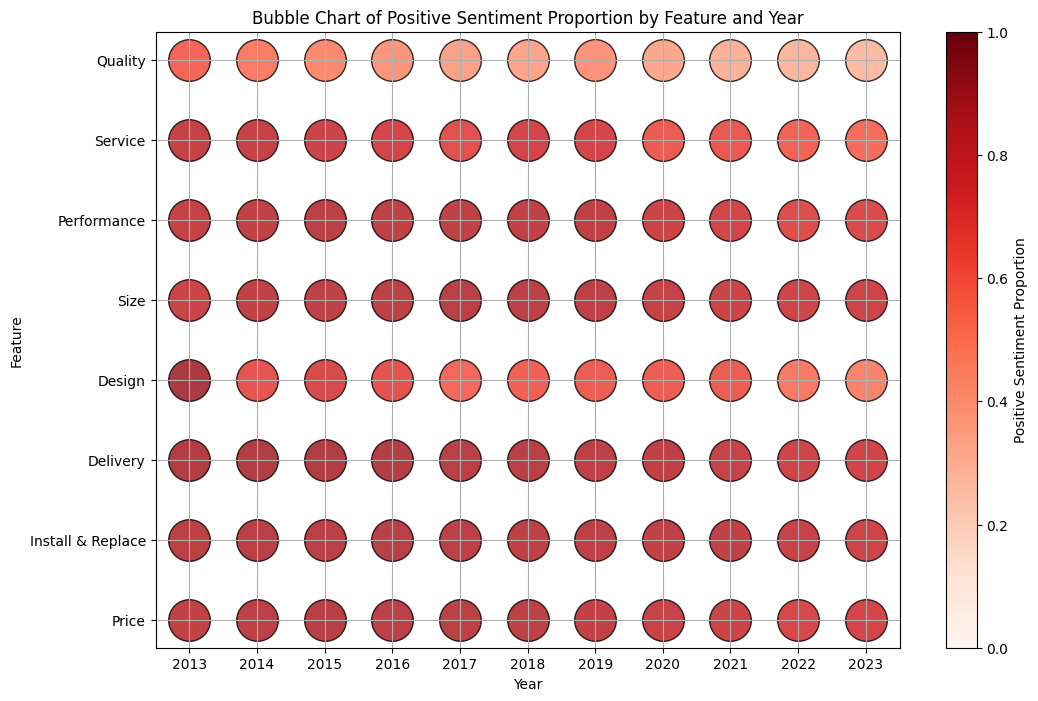

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Assuming the data is loaded into df_all


# Clean data
df_all['Sentiment Polarity'] = df_all['Sentiment Polarity'].str.strip()
df_all['Stars'] = df_all['Stars'].str.strip()
df_all['Sentiment Score'] = df_all['Sentiment Score'].astype(float)
df_all['Characteristic Score'] = df_all['Characteristic Score'].astype(float)
df_all['Characteristic'] = df_all['Characteristic'].str.strip()

# Ensure timestamp column is datetime type, and extract year
df_all['timestamp'] = pd.to_datetime(df_all['timestamp'])
df_all['year'] = df_all['timestamp'].dt.year

# Map sentiment to a binary label for calculating proportions (1 for positive, 0 otherwise)
df_all['label'] = df_all['Sentiment Polarity'].apply(lambda x: 1 if x == 'positive' else 0)

# Feature list
features = [
    'Price',
    'Install & Replace',
    'Delivery',
    'Design',
    'Size',
    'Performance',
    'Service',
    'Quality'
]

# Calculate the proportion of positive sentiment per feature per year
bab_data = pd.DataFrame(index=features, columns=np.sort(df_all['year'].unique()))

# Fill bab_data DataFrame
for year in bab_data.columns:
    for feature in bab_data.index:
        if df_all[(df_all['year'] == year) & (df_all['Characteristic'] == feature)]['label'].count() > 0:
            bab_data.loc[feature, year] = df_all[(df_all['year'] == year) & (df_all['Characteristic'] == feature)]['label'].mean()
        else:
            bab_data.loc[feature, year] = 0

# Create a color map for visualization
cmap = plt.cm.Reds  # You can change the color map to any you prefer

# Normalize the color map based on the proportion values
norm = mcolors.Normalize(vmin=0, vmax=1)

# Create a bubble chart
fig, ax = plt.subplots(figsize=(12, 8))
for feature in bab_data.index:
    for year in bab_data.columns:
        proportion = bab_data.loc[feature, year]
        color = cmap(norm(proportion))
        ax.scatter(year, feature, color=color, s=900, alpha=0.8, edgecolors='black')  # Fixed size

ax.set_xlabel('Year')
ax.set_ylabel('Feature')
ax.set_title('Bubble Chart of Positive Sentiment Proportion by Feature and Year')
ax.grid(True)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='vertical', label='Positive Sentiment Proportion')
plt.xticks(bab_data.columns)
plt.show()

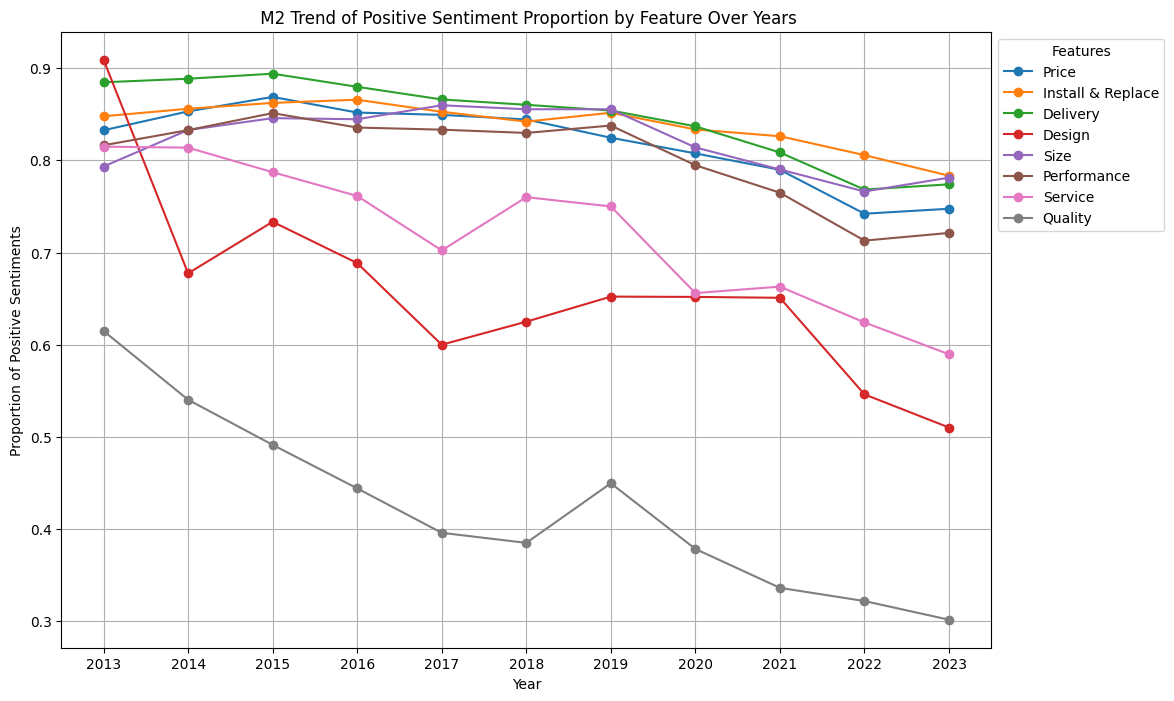

In [20]:
fig, ax = plt.subplots(figsize=(12, 8))

for feature in bab_data.index:
    ax.plot(bab_data.columns, bab_data.loc[feature], marker='o', label=feature)

ax.set_xlabel('Year')
ax.set_ylabel('Proportion of Positive Sentiments')
ax.set_title(' M2 Trend of Positive Sentiment Proportion by Feature Over Years')
ax.grid(True)
# Place the legend outside the plot area on the right side
ax.legend(title='Features', loc='upper left', bbox_to_anchor=(1,1))
plt.xticks(bab_data.columns)  # Ensure x-axis has the correct year labels
plt.show()

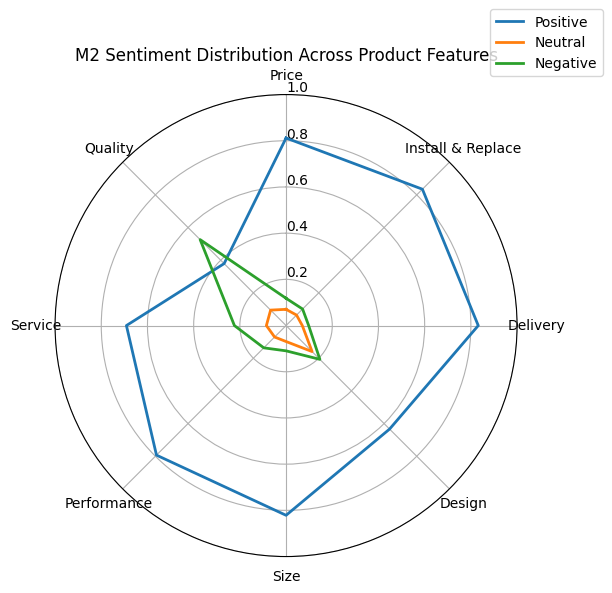

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi



# Clean data
df_all['Sentiment Polarity'] = df_all['Sentiment Polarity'].str.strip()
df_all['Stars'] = df_all['Stars'].str.strip()
df_all['Sentiment Score'] = df_all['Sentiment Score'].astype(float)
df_all['Characteristic Score'] = df_all['Characteristic Score'].astype(float)
df_all['Characteristic'] = df_all['Characteristic'].str.strip()

# List
features = [
    'Price',
    'Install & Replace',
    'Delivery',
    'Design',
    'Size',
    'Performance',
    'Service',
    'Quality'
]

# Caculate distribution
angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot
for sentiment in ['positive', 'neutral', 'negative']:
    values = []
    for feature in features:
        subset = df_all[df_all['Characteristic'] == feature]
        sentiment_count = subset['Sentiment Polarity'].value_counts(normalize=True).get(sentiment, 0)
        values.append(sentiment_count)
    values += values[:1]
    ax.plot(angles, values, label=sentiment.capitalize(), linewidth=2)

# Set Plot
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_thetagrids([a * 180 / pi for a in angles[:-1]], labels=features)
ax.set_rlabel_position(0)
ax.set_ylim(0, 1)
plt.title('M2 Sentiment Distribution Across Product Features')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
plt.show()


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

df_all.csv  M1.ipynb  M2.ipynb  Untitled0.ipynb
